<a href="https://colab.research.google.com/github/safranco8/ayvd-entregables-grupo-31/blob/main/AEyC/30_04_22_entregable_parte_1_22.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Diplomatura en Ciencia de Datos, Aprendizaje Automático y sus Aplicaciones**

**Exploración y Curación de Datos**

*Edición 2022*

----

# Trabajo práctico entregable - parte 1

En esta notebook, vamos a cargar el conjunto de datos de [la compentencia Kaggle](https://www.kaggle.com/dansbecker/melbourne-housing-snapshot) sobre estimación de precios de ventas de propiedades en Melbourne, Australia.

Utilizaremos el conjunto de datos reducido producido por [DanB](https://www.kaggle.com/dansbecker). Hemos subido una copia a un servidor de la Universidad Nacional de Córdoba para facilitar su acceso remoto.

In [2]:
!pip install python-decouple

In [3]:
import matplotlib.pyplot as plt
import numpy
import pandas as pd

import seaborn
seaborn.set_context('talk')

from decouple import config
from sqlalchemy import create_engine, text

In [72]:
import plotly
plotly.__version__
# Make sure it's 4.14.3
pd.options.display.float_format = '{:,.2f}'.format

In [5]:
melb_df = pd.read_csv(
    'https://cs.famaf.unc.edu.ar/~mteruel/datasets/diplodatos/melb_data.csv')
melb_df[:3]

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,...,1.0,1.0,202.0,NaN,NaN,Yarra,-37.7996,144.9984,Northern Metropolitan,4019.0
1,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,...,1.0,0.0,156.0,79.0,1900.0,Yarra,-37.8079,144.9934,Northern Metropolitan,4019.0
2,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,...,2.0,0.0,134.0,150.0,1900.0,Yarra,-37.8093,144.9944,Northern Metropolitan,4019.0


## Ejercicio 1 SQL: 

1. Crear una base de datos en SQLite utilizando la libreria [SQLalchemy](https://stackoverflow.com/questions/2268050/execute-sql-from-file-in-sqlalchemy).
https://docs.sqlalchemy.org/en/14/core/engines.html#sqlite

2. Ingestar los datos provistos en 'https://cs.famaf.unc.edu.ar/~mteruel/datasets/diplodatos/melb_data.csv' en una tabla y el dataset generado en clase con datos de airbnb y sus precios por codigo postal en otra.

3. Implementar consultas en SQL que respondan con la siguiente información:

    - cantidad de registros totales por ciudad.
    - cantidad de registros totales por barrio y ciudad.

4. Combinar los datasets de ambas tablas ingestadas utilizando el comando JOIN de SQL  para obtener un resultado similar a lo realizado con Pandas en clase.  



In [6]:
#Creamos una base de datos en SQLite utilizando la libreria SQLalchemy.  Melbourne, Australia
from sqlalchemy import create_engine, text

In [7]:
engine = create_engine('sqlite:///sysarmy.sqlite3', echo=True)

In [8]:
url = 'https://cs.famaf.unc.edu.ar/~mteruel/datasets/diplodatos/melb_data.csv' 
df = pd.read_csv(url)

In [52]:
def execute_print_sql(list_of_sql_sentences):
    with engine.connect() as con:
        for query in list_of_sql_sentences:
            rs = con.execute(query)
            print(query)
            for row in rs:
                print(row)
            print('\n\n')

def execute_sql(query):
    with engine.connect() as con:
        rs = con.execute(query)
        return rs           

In [10]:
df["Suburb"].unique()

array(['Abbotsford', 'Airport West', 'Albert Park', 'Alphington',
       'Altona', 'Altona North', 'Armadale', 'Ascot Vale', 'Ashburton',
       'Ashwood', 'Avondale Heights', 'Balaclava', 'Balwyn',
       'Balwyn North', 'Bentleigh', 'Bentleigh East', 'Box Hill',
       'Braybrook', 'Brighton', 'Brighton East', 'Brunswick',
       'Brunswick West', 'Bulleen', 'Burwood', 'Camberwell', 'Canterbury',
       'Carlton North', 'Carnegie', 'Caulfield', 'Caulfield North',
       'Caulfield South', 'Chadstone', 'Clifton Hill', 'Coburg',
       'Coburg North', 'Collingwood', 'Doncaster', 'Eaglemont',
       'Elsternwick', 'Elwood', 'Essendon', 'Essendon North', 'Fairfield',
       'Fitzroy', 'Fitzroy North', 'Flemington', 'Footscray', 'Glen Iris',
       'Glenroy', 'Gowanbrae', 'Hadfield', 'Hampton', 'Hampton East',
       'Hawthorn', 'Heidelberg Heights', 'Heidelberg West', 'Hughesdale',
       'Ivanhoe', 'Kealba', 'Keilor East', 'Kensington', 'Kew',
       'Kew East', 'Kooyong', 'Maidstone', 

In [11]:
df.to_sql('Melbourne', con=engine, if_exists="replace")

2022-04-30 13:22:17,271 INFO sqlalchemy.engine.Engine PRAGMA main.table_info("Melbourne")
2022-04-30 13:22:17,279 INFO sqlalchemy.engine.Engine [raw sql] ()
2022-04-30 13:22:17,287 INFO sqlalchemy.engine.Engine PRAGMA temp.table_info("Melbourne")
2022-04-30 13:22:17,293 INFO sqlalchemy.engine.Engine [raw sql] ()
2022-04-30 13:22:17,299 INFO sqlalchemy.engine.Engine BEGIN (implicit)
2022-04-30 13:22:17,303 INFO sqlalchemy.engine.Engine 
CREATE TABLE "Melbourne" (
	"index" BIGINT, 
	"Suburb" TEXT, 
	"Address" TEXT, 
	"Rooms" BIGINT, 
	"Type" TEXT, 
	"Price" FLOAT, 
	"Method" TEXT, 
	"SellerG" TEXT, 
	"Date" TEXT, 
	"Distance" FLOAT, 
	"Postcode" FLOAT, 
	"Bedroom2" FLOAT, 
	"Bathroom" FLOAT, 
	"Car" FLOAT, 
	"Landsize" FLOAT, 
	"BuildingArea" FLOAT, 
	"YearBuilt" FLOAT, 
	"CouncilArea" TEXT, 
	"Lattitude" FLOAT, 
	"Longtitude" FLOAT, 
	"Regionname" TEXT, 
	"Propertycount" FLOAT
)


2022-04-30 13:22:17,306 INFO sqlalchemy.engine.Engine [no key 0.00306s] ()
2022-04-30 13:22:17,324 INFO sql

In [12]:
#cantidad de registros totales por codigo postal.
query1 = "SELECT Postcode, COUNT(1) FROM Melbourne GROUP BY Postcode"
query2 = "SELECT Postcode, Suburb, COUNT(1) FROM Melbourne GROUP BY Postcode, Suburb"
queries = [query1, query2]

In [54]:
execute_print_sql(queries)

2022-04-30 15:19:03,577 INFO sqlalchemy.engine.Engine SELECT city, COUNT(1) FROM Airbnb GROUP BY city
2022-04-30 15:19:03,586 INFO sqlalchemy.engine.Engine [raw sql] ()
SELECT city, COUNT(1) FROM Airbnb GROUP BY city
('Banyule', 203)
('Bayside', 375)
('Boroondara', 664)
('Brimbank', 108)
('Cardinia', 123)
('Casey', 153)
('Darebin', 698)
('Frankston', 177)
('Glen Eira', 631)
('Greater Dandenong', 147)
('Hobsons Bay', 239)
('Hume', 170)
('Kingston', 309)
('Knox', 175)
('Manningham', 313)
('Maribyrnong', 436)
('Maroondah', 115)
('Melbourne', 7368)
('Melton', 95)
('Monash', 571)
('Moonee Valley', 344)
('Moreland', 967)
('Nillumbik', 88)
('Port Phillip', 2808)
('Stonnington', 1621)
('Whitehorse', 614)
('Whittlesea', 137)
('Wyndham', 426)
('Yarra', 2049)
('Yarra Ranges', 771)



2022-04-30 15:19:03,656 INFO sqlalchemy.engine.Engine SELECT city, neighborhood, COUNT(1) FROM Airbnb GROUP BY city, neighborhood
2022-04-30 15:19:03,663 INFO sqlalchemy.engine.Engine [raw sql] ()
SELECT city, neighb

In [33]:
#Cargamos una base de datos  de airbnb
# data source:
# https://www.kaggle.com/tylerx/melbourne-airbnb-open-data?select=cleansed_listings_dec18.csv
interesting_cols = [
  'description', 'neighborhood_overview',
  'street', 'neighborhood', 'city', 'suburb', 'state', 'zipcode',
  'price', 'weekly_price', 'monthly_price',
  'latitude', 'longitude', 'review_scores_rating'
]
airbnb_df = pd.read_csv(
    'https://cs.famaf.unc.edu.ar/~mteruel/datasets/diplodatos/cleansed_listings_dec18.csv',
    usecols=interesting_cols)
"""
airbnb_df = pd.read_csv(
    'https://cs.famaf.unc.edu.ar/~mteruel/datasets/diplodatos/cleansed_listings_dec18.csv')
"""
print(df.columns)
print(airbnb_df.columns)

Index(['Suburb', 'Address', 'Rooms', 'Type', 'Price', 'Method', 'SellerG',
       'Date', 'Distance', 'Postcode', 'Bedroom2', 'Bathroom', 'Car',
       'Landsize', 'BuildingArea', 'YearBuilt', 'CouncilArea', 'Lattitude',
       'Longtitude', 'Regionname', 'Propertycount'],
      dtype='object')
Index(['description', 'neighborhood_overview', 'street', 'neighborhood',
       'city', 'suburb', 'state', 'zipcode', 'latitude', 'longitude', 'price',
       'weekly_price', 'monthly_price', 'review_scores_rating'],
      dtype='object')


/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (35) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [34]:
airbnb_df.to_sql('Airbnb', con=engine, if_exists="replace")

2022-04-30 14:06:07,156 INFO sqlalchemy.engine.Engine PRAGMA main.table_info("Airbnb")
2022-04-30 14:06:07,158 INFO sqlalchemy.engine.Engine [raw sql] ()
2022-04-30 14:06:07,164 INFO sqlalchemy.engine.Engine PRAGMA main.table_info("Airbnb")
2022-04-30 14:06:07,166 INFO sqlalchemy.engine.Engine [raw sql] ()
2022-04-30 14:06:07,169 INFO sqlalchemy.engine.Engine SELECT name FROM sqlite_master WHERE type='table' ORDER BY name
2022-04-30 14:06:07,172 INFO sqlalchemy.engine.Engine [raw sql] ()
2022-04-30 14:06:07,175 INFO sqlalchemy.engine.Engine PRAGMA main.table_info("Airbnb")
2022-04-30 14:06:07,177 INFO sqlalchemy.engine.Engine [raw sql] ()
2022-04-30 14:06:07,183 INFO sqlalchemy.engine.Engine SELECT sql FROM  (SELECT * FROM sqlite_master UNION ALL   SELECT * FROM sqlite_temp_master) WHERE name = ? AND type = 'table'
2022-04-30 14:06:07,186 INFO sqlalchemy.engine.Engine [raw sql] ('Airbnb',)
2022-04-30 14:06:07,189 INFO sqlalchemy.engine.Engine PRAGMA main.foreign_key_list("Airbnb")
2022

In [16]:
#cantidad de registros totales por codigo postal.
query1 = "SELECT city, COUNT(1) FROM Airbnb GROUP BY city"
query2 ="SELECT city, neighborhood, COUNT(1) FROM Airbnb GROUP BY city, neighborhood"
queries = [query1, query2]

In [17]:
execute_print_sql(queries)

2022-04-30 13:22:27,718 INFO sqlalchemy.engine.Engine SELECT city, COUNT(1) FROM Airbnb GROUP BY city
2022-04-30 13:22:27,725 INFO sqlalchemy.engine.Engine [raw sql] ()
SELECT city, COUNT(1) FROM Airbnb GROUP BY city
('Banyule', 203)
('Bayside', 375)
('Boroondara', 664)
('Brimbank', 108)
('Cardinia', 123)
('Casey', 153)
('Darebin', 698)
('Frankston', 177)
('Glen Eira', 631)
('Greater Dandenong', 147)
('Hobsons Bay', 239)
('Hume', 170)
('Kingston', 309)
('Knox', 175)
('Manningham', 313)
('Maribyrnong', 436)
('Maroondah', 115)
('Melbourne', 7368)
('Melton', 95)
('Monash', 571)
('Moonee Valley', 344)
('Moreland', 967)
('Nillumbik', 88)
('Port Phillip', 2808)
('Stonnington', 1621)
('Whitehorse', 614)
('Whittlesea', 137)
('Wyndham', 426)
('Yarra', 2049)
('Yarra Ranges', 771)



2022-04-30 13:22:27,858 INFO sqlalchemy.engine.Engine SELECT city, neighborhood, COUNT(1) FROM Airbnb GROUP BY city, neighborhood
2022-04-30 13:22:27,860 INFO sqlalchemy.engine.Engine [raw sql] ()
SELECT city, neighb

In [ ]:
#cantidad de registros totales por ciudad.
query1 = "SELECT Postcode, COUNT(1) FROM Melbourne GROUP BY Postcode"

queries = [query1, query2]

In [18]:
#Combinar los datasets de ambas tablas ingestadas utilizando el comando JOIN de SQL para obtener un resultado similar a lo realizado con Pandas en clase.

In [55]:
print(airbnb_df.columns)


airbnb_agg ="""SELECT cast(zipcode as int) as int_zipcode, 
                          ROUND(AVG(price), 2) as avg_price, 
                          ROUND(AVG(monthly_price), 2) as avg_monthly_price,
                          ROUND(AVG(weekly_price), 2) as avg_weekly_price,
                          ROUND(AVG(review_scores_rating), 2) as avg_review_scores_rating,
                          COUNT(*)
                  FROM Airbnb GROUP BY int_zipcode"""

execute_print_sql([airbnb_agg])


Index(['description', 'neighborhood_overview', 'street', 'neighborhood',
       'city', 'suburb', 'state', 'zipcode', 'latitude', 'longitude', 'price',
       'weekly_price', 'monthly_price', 'review_scores_rating'],
      dtype='object')
2022-04-30 15:19:52,488 INFO sqlalchemy.engine.Engine SELECT cast(zipcode as int) as int_zipcode, 
                          ROUND(AVG(price), 2) as avg_price, 
                          ROUND(AVG(monthly_price), 2) as avg_monthly_price,
                          ROUND(AVG(weekly_price), 2) as avg_weekly_price,
                          ROUND(AVG(review_scores_rating), 2) as avg_review_scores_rating,
                          COUNT(*)
                  FROM Airbnb GROUP BY int_zipcode
2022-04-30 15:19:52,494 INFO sqlalchemy.engine.Engine [raw sql] ()
SELECT cast(zipcode as int) as int_zipcode, 
                          ROUND(AVG(price), 2) as avg_price, 
                          ROUND(AVG(monthly_price), 2) as avg_monthly_price,
                    

In [65]:
#Join entre Melb y airbnb[interesting_cols]

sales_airbnb_join ="""
                  WITH airbnb_agg as 
                  (SELECT cast(zipcode as int) as int_zipcode, 
                          ROUND(AVG(price), 2) as avg_price, 
                          ROUND(AVG(monthly_price), 2) as avg_monthly_price,
                          ROUND(AVG(weekly_price), 2) as avg_weekly_price,
                          ROUND(AVG(review_scores_rating), 2) as avg_review_scores_rating,
                          COUNT(*) as zipcode_count
                  FROM Airbnb GROUP BY int_zipcode)

                  SELECT  m.*, 
                          avg_price,
                          avg_monthly_price,
                          avg_weekly_price,
                          avg_review_scores_rating,
                          zipcode_count
                  FROM Melbourne m 
                  left join airbnb_agg a on m.Postcode == a.int_zipcode"""

execute_print_sql([sales_airbnb_join])

Se truncaron las últimas líneas 5000 del resultado de transmisión.
(7117, 'Murrumbeena', '1/22 Gerald St', 4, 't', 1100000.0, 'SP', 'hockingstuart', '4/03/2017', 12.1, 3163.0, 4.0, 3.0, 2.0, 286.0, 160.0, 1990.0, 'Glen Eira', -37.8958, 145.0696, 'Southern Metropolitan', 4442.0, 94.21, 2047.75, 553.15, 94.62, 156)
(7118, 'Murrumbeena', '537 Neerim Rd', 4, 'h', 1500000.0, 'S', 'hockingstuart', '4/03/2017', 12.1, 3163.0, 4.0, 2.0, 1.0, 650.0, None, 1935.0, 'Glen Eira', -37.8918, 145.0769, 'Southern Metropolitan', 4442.0, 94.21, 2047.75, 553.15, 94.62, 156)
(7119, 'Murrumbeena', '11 Perth St', 3, 'h', 1470000.0, 'S', 'Hodges', '4/03/2017', 12.1, 3163.0, 3.0, 1.0, 2.0, 701.0, None, None, 'Glen Eira', -37.8868, 145.0688, 'Southern Metropolitan', 4442.0, 94.21, 2047.75, 553.15, 94.62, 156)
(7120, 'Murrumbeena', '3 Churchill Cl', 3, 't', 1160000.0, 'S', 'hockingstuart', '4/06/2016', 12.1, 3163.0, 3.0, 2.0, 2.0, 302.0, 172.0, 2000.0, 'Glen Eira', -37.9043, 145.0622, 'Southern Metropolitan', 444

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



## Ejercicio 2: 

1. Seleccionar un subconjunto de columnas que les parezcan relevantes al problema de predicción del valor de la propiedad. Justificar las columnas seleccionadas y las que no lo fueron.
 - Eliminar los valores extremos que no sean relevantes para la predicción de valores de las propiedades.

2. Agregar información adicional respectiva al entorno de una propiedad a partir del [conjunto de datos de AirBnB](https://www.kaggle.com/tylerx/melbourne-airbnb-open-data?select=cleansed_listings_dec18.csv) utilizado en el práctico. 
  1. Seleccionar qué variables agregar y qué combinaciones aplicar a cada una. Por ejemplo, pueden utilizar solo la columna `price`, o aplicar múltiples transformaciones como la mediana o el mínimo.
  1. Utilizar la variable zipcode para unir los conjuntos de datos. Sólo incluir los zipcodes que tengan una cantidad mínima de registros (a elección) como para que la información agregada sea relevante.
  2. Investigar al menos otras 2 variables que puedan servir para combinar los datos, y justificar si serían adecuadas o no. Pueden asumir que cuentan con la ayuda de anotadores expertos para encontrar equivalencias entre barrios o direcciones, o que cuentan con algoritmos para encontrar las n ubicaciones más cercanas a una propiedad a partir de sus coordenadas geográficas. **NO** es necesario que realicen la implementación.

Pueden leer otras columnas del conjunto de AirBnB además de las que están en `interesting_cols`, si les parecen relevantes.

2022-04-30 16:04:27,396 INFO sqlalchemy.engine.Engine 
select Price from Melbourne



INFO:sqlalchemy.engine.Engine:
select Price from Melbourne



2022-04-30 16:04:27,402 INFO sqlalchemy.engine.Engine [raw sql] ()


INFO:sqlalchemy.engine.Engine:[raw sql] ()


count      13,580.00
mean    1,075,684.08
std       639,310.72
min        85,000.00
25%       650,000.00
50%       903,000.00
75%     1,330,000.00
max     9,000,000.00
Name: Price, dtype: float64


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


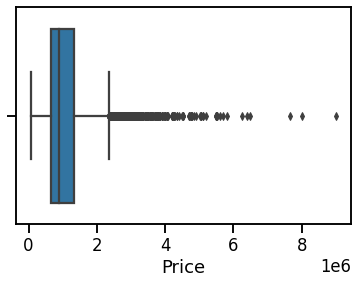

In [97]:
#Cantidad de filas por zipcode

price_avg= """
select Price from Melbourne
"""
price_avg_df = pd.read_sql_query(price_avg, engine).dropna()
print(price_avg_df["Price"].describe())
seaborn.boxplot(price_avg_df["Price"])

price_limit = price_avg_df["Price"].quantile(0.95)


2022-04-30 16:00:09,376 INFO sqlalchemy.engine.Engine 
select cast(zipcode as int) as zipcode, count(zipcode) as count 
  from Airbnb 
  group by zipcode

2022-04-30 16:00:09,379 INFO sqlalchemy.engine.Engine [raw sql] ()
count     463.00
mean       49.14
std       147.48
min         1.00
25%         5.00
50%        15.00
75%        40.00
max     2,491.00
Name: count, dtype: float64


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


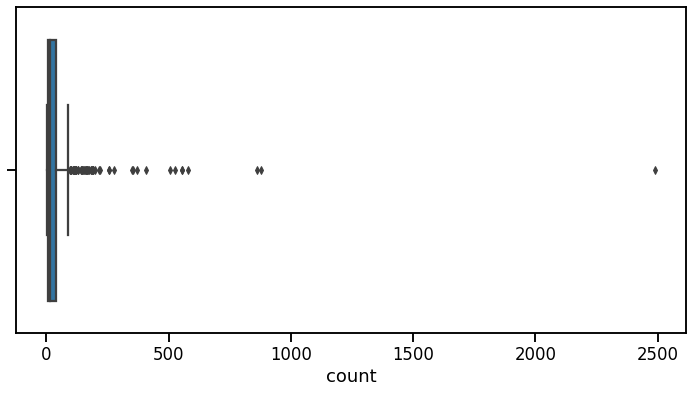

In [95]:
zipcode_count ="""
select cast(zipcode as int) as zipcode, count(zipcode) as count 
  from Airbnb 
  group by zipcode
"""
  #having count(zipcode) < 1000
zipcode_count_df = pd.read_sql_query(zipcode_count, engine).dropna()
print(zipcode_count_df["count"].describe())

plt.figure(figsize=(12, 6))
seaborn.boxplot(zipcode_count_df["count"])


In [104]:
"""
Join entre Melb y airbnb[interesting_cols] con filtros para cantidad de 
registros por zipcode (right) y límite de precios (left)
"""


filtered_join ="""
                  WITH airbnb_agg as 
                  (SELECT cast(zipcode as int) as int_zipcode, 
                          ROUND(AVG(price), 2) as avg_price, 
                          ROUND(AVG(monthly_price), 2) as avg_monthly_price,
                          ROUND(AVG(weekly_price), 2) as avg_weekly_price,
                          ROUND(AVG(review_scores_rating), 2) as avg_review_scores_rating,
                          COUNT(*) as zipcode_count
                  FROM Airbnb 
                  GROUP BY int_zipcode
                  HAVING zipcode_count > 4)

                  SELECT  m.*, 
                          avg_price,
                          avg_monthly_price,
                          avg_weekly_price,
                          avg_review_scores_rating,
                          zipcode_count
                  FROM Melbourne m 
                  left join airbnb_agg a on m.Postcode == a.int_zipcode
                  WHERE m.Price < """ + str(price_limit)


execute_print_sql([filtered_join])


2022-04-30 16:10:41,563 INFO sqlalchemy.engine.Engine 
                  WITH airbnb_agg as 
                  (SELECT cast(zipcode as int) as int_zipcode, 
                          ROUND(AVG(price), 2) as avg_price, 
                          ROUND(AVG(monthly_price), 2) as avg_monthly_price,
                          ROUND(AVG(weekly_price), 2) as avg_weekly_price,
                          ROUND(AVG(review_scores_rating), 2) as avg_review_scores_rating,
                          COUNT(*) as zipcode_count
                  FROM Airbnb 
                  GROUP BY int_zipcode
                  HAVING zipcode_count > 4)

                  SELECT  m.*, 
                          avg_price,
                          avg_monthly_price,
                          avg_weekly_price,
                          avg_review_scores_rating,
                          zipcode_count
                  FROM Melbourne m 
                  left join airbnb_agg a on m.Postcode == a.int_zipcode
             

INFO:sqlalchemy.engine.Engine:
                  WITH airbnb_agg as 
                  (SELECT cast(zipcode as int) as int_zipcode, 
                          ROUND(AVG(price), 2) as avg_price, 
                          ROUND(AVG(monthly_price), 2) as avg_monthly_price,
                          ROUND(AVG(weekly_price), 2) as avg_weekly_price,
                          ROUND(AVG(review_scores_rating), 2) as avg_review_scores_rating,
                          COUNT(*) as zipcode_count
                  FROM Airbnb 
                  GROUP BY int_zipcode
                  HAVING zipcode_count > 4)

                  SELECT  m.*, 
                          avg_price,
                          avg_monthly_price,
                          avg_weekly_price,
                          avg_review_scores_rating,
                          zipcode_count
                  FROM Melbourne m 
                  left join airbnb_agg a on m.Postcode == a.int_zipcode
                  WHERE m.Price < 229

2022-04-30 16:10:41,571 INFO sqlalchemy.engine.Engine [raw sql] ()


INFO:sqlalchemy.engine.Engine:[raw sql] ()


Se truncaron las últimas líneas 5000 del resultado de transmisión.
(7729, 'Chadstone', '4/6 Kelly St', 3, 'u', 701000.0, 'PI', 'Ray', '8/04/2017', 13.6, 3148.0, 3.0, 2.0, 2.0, 235.0, 112.0, 2000.0, 'Monash', -37.8856, 145.0934, 'Southern Metropolitan', 3582.0, 79.5, 1660.33, 197.5, 95.57, 26)
(7730, 'Chadstone', '1/29 Atkinson St', 3, 't', 905000.0, 'S', 'Buxton', '20/05/2017', 13.6, 3148.0, 3.0, 1.0, 2.0, 418.0, 132.0, 1955.0, 'Monash', -37.886, 145.096, 'Southern Metropolitan', 3582.0, 79.5, 1660.33, 197.5, 95.57, 26)
(7731, 'Chadstone', '2/13 Batesford Rd', 3, 'u', 988000.0, 'SA', 'Buxton', '20/05/2017', 13.6, 3148.0, 3.0, 2.0, 2.0, 286.0, 124.0, 2008.0, 'Monash', -37.8755, 145.0954, 'Southern Metropolitan', 3582.0, 79.5, 1660.33, 197.5, 95.57, 26)
(7732, 'Chadstone', '2/16 Westbrook St', 3, 't', 820000.0, 'VB', 'hockingstuart', '20/05/2017', 13.6, 3148.0, 3.0, 2.0, 2.0, 213.0, 115.0, 2012.0, 'Monash', -37.8827, 145.0942, 'Southern Metropolitan', 3582.0, 79.5, 1660.33, 197.5, 95.57,

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



## Ejercicio 3:

Crear y guardar un nuevo conjunto de datos con todas las transformaciones realizadas anteriormente.

## Ejercicios opcionales:

1. Armar un script en python (archivo .py) [ETL](https://towardsdatascience.com/what-to-log-from-python-etl-pipelines-9e0cfe29950e) que corra los pasos de extraccion, transformacion y carga, armando una funcion para cada etapa del proceso y luego un main que corra todos los pasos requeridos.

2. Armar un DAG en Apache Airflow que corra el ETL. (https://airflow.apache.org/docs/apache-airflow/stable/tutorial.html)